In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets 

In [8]:
%matplotlib inline

zeros np VS torch

In [9]:
boston = sklearn.datasets.load_boston()

In [ ]:
x = boston.data[:,-1]
x = x/np.max(x)
y = boston.target

Description of the dataset https://scikit-learn.org/stable/datasets/toy_dataset.html

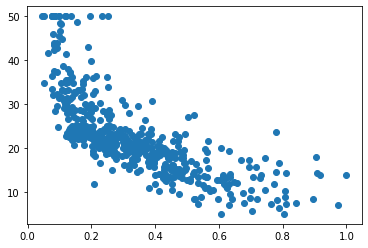

In [ ]:
plt.scatter(x, y);

Linear Regression Model: 
$$\hat{y} = wx+b$$
$$L(w,\ b) = \sum_{i=1}^{N} \left(\hat{y}_i - y_i\right)^2 \to \min$$
Gradient Descend:
Take $w^{old}=w_0$ and $b^{old}=b_0$
Update $w^{new} = w^{old} - \frac{\partial L}{\partial w}$ $b^{new} = b^{old} - \frac{\partial L}{\partial b}$

Q1. Show that 
$$\frac{\partial L}{\partial w} = 2\sum_{i=1}^{N} x_i \left(\hat{y}_i - y_i\right)$$
$$\frac{\partial L}{\partial b} = 2\sum_{i=1}^{N}  \left(\hat{y}_i - y_i\right)$$

In [ ]:
w_0 = np.random.rand()
b_0 = np.random.rand()
w_old = w_0
b_old = b_0

x_t = torch.tensor(x, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)
w = torch.tensor(w_0, requires_grad=True, dtype=torch.float32)
b = torch.tensor(b_0, requires_grad=True, dtype=torch.float32)

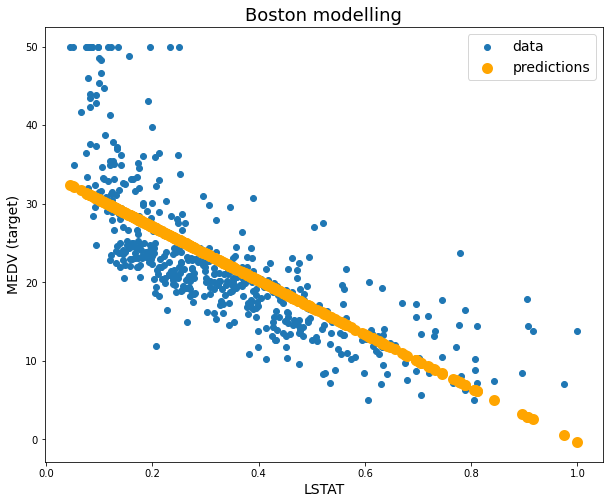

In [ ]:
from IPython.display import clear_output
alpha = 0.5
for i in range(100):
  y_pred = w_old*x+b_old  
  #y_p = w*x_t+b
  #loss = torch.mean((y_p-y_t)**2)
  #loss.backward()
  #print(w.grad, b.grad)
  dw = 2*np.mean(x*(y_pred - y))
  db = 2*np.mean(y_pred - y)
  #print(dw, db)
  w_new = w_old - alpha*dw
  b_new = b_old - alpha*db
  w_old = w_new
  b_old = b_new

  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.figure(figsize=(10,8))
    plt.scatter(x, y, label="data")
    plt.scatter(x, y_pred, color="orange", linewidth=5, label="predictions")
    plt.xlabel("LSTAT", fontsize=14)
    plt.ylabel("MEDV (target)", fontsize=14)
    plt.title("Boston modelling", fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

## Automatic Differentiation
## Detaching variables

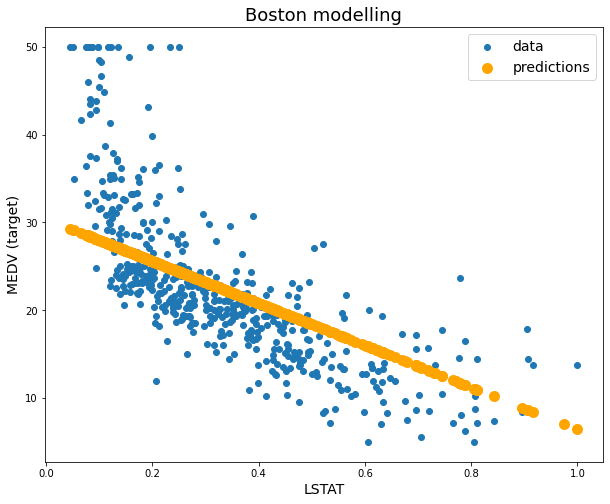

In [ ]:
alpha = 0.1
for i in range(100):
  y_p = w*x_t+b
  loss = torch.mean((y_p-y_t)**2)
  loss.backward()
  #print(w.grad, b.grad)
  #dw = 2*np.mean(x*(y_pred - y))
  #db = 2*np.mean(y_pred - y)
  #print(dw, db)
  w.data = w.data - alpha*w.grad
  b.data = b.data - alpha*b.grad
  #w_old = w_new
  #b_old = b_new
  w.grad.data.zero_()
  b.grad.data.zero_()

  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.figure(figsize=(10,8))
    plt.scatter(x, y, label="data")
    plt.scatter(x, y_p.data.numpy(), color="orange", linewidth=5, label="predictions")
    plt.xlabel("LSTAT", fontsize=14)
    plt.ylabel("MEDV (target)", fontsize=14)
    plt.title("Boston modelling", fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

One-Layer NN

$x$ $z$ $a$ $o$ $L$
$z = W^{[1]}x+b^{[1]}$ $a=\sigma(z)$ $o = W^{[2]}a+b^{[2]}$ $L=o-t$
$a_1 = \sigma\left( w_{11}^{[1]}x + b_1^{[1]}\right)$

$$W^{[1]} = \begin{pmatrix} w^{[1]}_{11}\\ w^{[1]}_{12}\\ \vdots\\ w^{[1]}_{1N_h}\end{pmatrix},\qquad b^{[1]}=\begin{pmatrix} b^{[1]}_{1}\\ b^{[1]}_{2}\\ \vdots\\ b^{[1]}_{N_h}\end{pmatrix}$$

$$W^{[2]} = \begin{pmatrix} w^{[2]}_{11} & w^{[2]}_{21} & \ldots & w^{[2]}_{N_h 1}\end{pmatrix},\qquad b^{[2]}=\begin{pmatrix} b^{[2]}_{1}\end{pmatrix}$$

\begin{equation}
L = (o-t)^2 = \left( w^{[2]}_{11}a_1 + w^{[2]}_{21} a_2 + \ldots w^{[2]}_{N_h 1}a_{N_h} + b_1^{[2]}- t\right)^2
\end{equation}
\begin{equation}
\frac{\partial L}{\partial o} = 2(o-t)
\end{equation}
$$\frac{\partial L}{\partial b_1^{[2]}} = 2(o-t) = \frac{\partial L}{\partial o} $$
$$\frac{\partial L}{\partial w_{i1}^{[2]}} = 2a_{i}(o-t) = a_{i} \frac{\partial L}{\partial o} $$
$$\frac{\partial L}{\partial w^{[2]}} = 2a^T(o-t) = a^T \frac{\partial L}{\partial o} $$

$$\frac{\partial L}{\partial b_1^{[1]}} = 2w_{11}^{[2]}(o-t)\frac{\partial a_1}{\partial b_1^{[1]}} = w_{11}^{[2]}\frac{\partial L}{\partial o} a_1(1-a_1)$$
$$\frac{\partial L}{\partial b^{[1]}} = W^{[2]T}a(1-a)\frac{\partial L}{\partial o}$$

$$\frac{\partial L}{\partial w_{11}^{[1]}} = 2w_{11}^{[2]}(o-t)\frac{\partial a_1}{\partial w_{11}^{[1]}} = w_{11}^{[2]}\frac{\partial L}{\partial o} a_1(1-a_1) x$$
$$\frac{\partial L}{\partial W^{[1]}} = W^{[2]T}a(1-a)\frac{\partial L}{\partial o}x$$

In [ ]:
hidden_size = 50
W1 = np.random.randn(hidden_size,1)
b1 = np.random.randn(hidden_size,1)
W2 = np.random.randn(1,hidden_size)
b2 = np.random.randn(1,1)

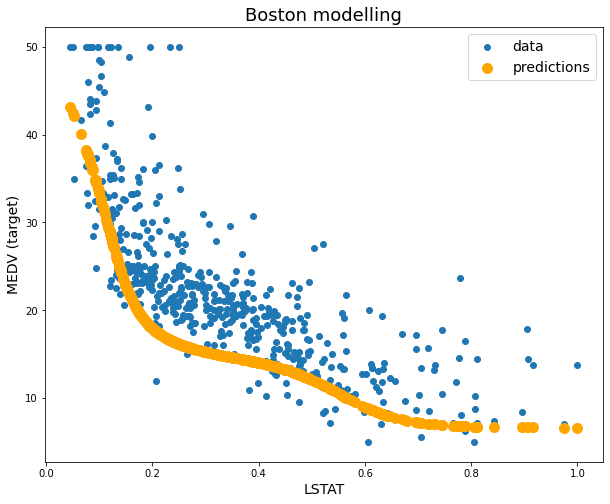

In [ ]:
num_epochs = 100
alpha = 0.05
for i in range(num_epochs):
  L=0
  for n in range(len(x)):
    z = W1*x[n]+b1
    #print(z.shape)
    a = sigmoid(z)
    #print(a.shape)
    o = W2.dot(a)+b2
    L = L + (o-y[n])**2
    #print(o.shape)
    do = 2*(o-y[n])
    #print(do.shape)
    db2 = do
    dW2 = a.T*do
    #print(dW2.shape)
    db1 = W2.T*a*(1-a)*do
    #print(db1.shape)
    dW1 = db1*x[n]
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
  #print(L/len(x)) 
  y_p = (W2.dot(sigmoid(W1*x.reshape(1,-1)+b1)) + b2).reshape(-1)
  clear_output(True)
  plt.figure(figsize=(10,8))
  plt.scatter(x, y, label="data")
  plt.scatter(x, y_p, color="orange", linewidth=5, label="predictions")
  plt.xlabel("LSTAT", fontsize=14)
  plt.ylabel("MEDV (target)", fontsize=14)
  plt.title("Boston modelling", fontsize=18)
  plt.legend(fontsize=14)
  plt.show() 

In [ ]:
import torch.nn as nn

In [ ]:
class MyNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MyNN, self).__init__()
    self.hidden_size = hidden_size
    #The input shape: batch_size, sequence_length, input_size (feature size)
    self.fc1 = nn.Linear(input_size,hidden_size)
    self.a1 = nn.Sigmoid()
    self.fc2 = nn.Linear(hidden_size,hidden_size)
    self.a2 = nn.ReLU()
    self.fc = nn.Linear(hidden_size,output_size)

  def forward(self, x):
      out = self.fc1(x)
      out = self.a1(out)
      #out = self.fc2(out)
      #out = self.a2(out)
      out = self.fc(out)
      return out


In [ ]:
model = MyNN(1,20,1)

In [ ]:
criterion = nn.MSELoss()

In [ ]:
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 50

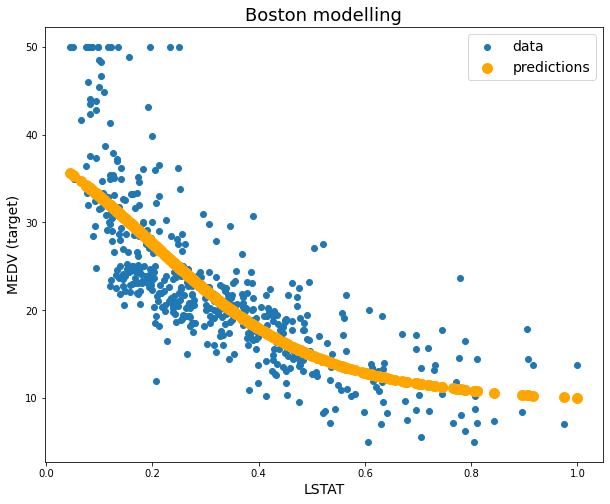

In [ ]:
for epoch in range(num_epochs):
  outputs = model(x_t.unsqueeze(dim=-1))
  loss = criterion(outputs, y_t.unsqueeze(dim=-1))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print(f'epoch {epoch+1} / loss = {loss.item():.4f}')
  
  clear_output(True)
  plt.figure(figsize=(10,8))
  plt.scatter(x, y, label="data")
  plt.scatter(x, outputs.squeeze(dim=-1).data.numpy(), color="orange", linewidth=5, label="predictions")
  plt.xlabel("LSTAT", fontsize=14)
  plt.ylabel("MEDV (target)", fontsize=14)
  plt.title("Boston modelling", fontsize=18)
  plt.legend(fontsize=14)
  plt.show()

# Multidimensional input

In [11]:
N = 200
noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
no_structure = np.random.rand(N, 2), np.random.binomial(1,0.5,N)
# multinomial
blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)

In [18]:
X, Y = noisy_moons
X = X.T
Y = Y.reshape(1,-1)
#Y = 2*Y - 1

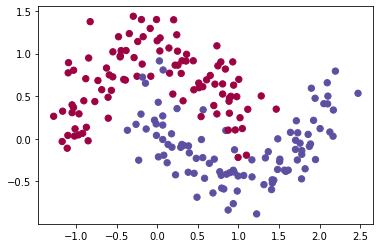

In [19]:
# Visualize the data:
plt.scatter(X[0, :], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral);